# Forecasting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
df = pd.read_csv('london_weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


## Opis karakteristika
| Karakteristika | Opis
| -------- | ------- |
| date | Datum merenja |
| cloud_cover | Oblačnost merena u oktama |
| sunshine | Broj sunčanih sati u danu |
| global_radiation | Zračenje mereno u vatima po metru kvadratnom |
| max_temp  | Maksimalna temperatura u toku dana |
| mean_temp  | Srednja temperatura u toku dana   |
| min_temp |  Minimalna temperatura u toku dana |
| precipitation |  Padavine izražene u milimetrima   |
| pressure | Atmosferski pritisak izražen u Paskalima  |
| snow_depth | Visina snežnog pokrivača u milimetrima   |

In [4]:
df.isna().sum().sort_values(ascending=False)

snow_depth          1441
mean_temp             36
cloud_cover           19
global_radiation      19
max_temp               6
precipitation          6
pressure               4
min_temp               2
date                   0
sunshine               0
dtype: int64

In [5]:
df['snow_depth']=df['snow_depth'].fillna(0)

In [6]:
df['date'].head()

0    19790101
1    19790102
2    19790103
3    19790104
4    19790105
Name: date, dtype: int64

In [7]:
df['date']= pd.to_datetime(df['date'],format='%Y%m%d',errors='coerce')

In [8]:
print(df['date'].max())
print(df['date'].min())
df = df.set_index("date")

2020-12-31 00:00:00
1979-01-01 00:00:00


In [9]:
interp_cols = ['max_temp', 'min_temp', 'mean_temp', 'pressure',
               'global_radiation', 'cloud_cover',"precipitation"]

# time-aware interpolation; limit avoids long bridges
df[interp_cols] = (
    df[interp_cols]
      .interpolate(method='time', limit=3, limit_direction='both')
      .ffill().bfill()
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15341 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15341 non-null  float64
 3   max_temp          15341 non-null  float64
 4   mean_temp         15341 non-null  float64
 5   min_temp          15341 non-null  float64
 6   precipitation     15341 non-null  float64
 7   pressure          15341 non-null  float64
 8   snow_depth        15341 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


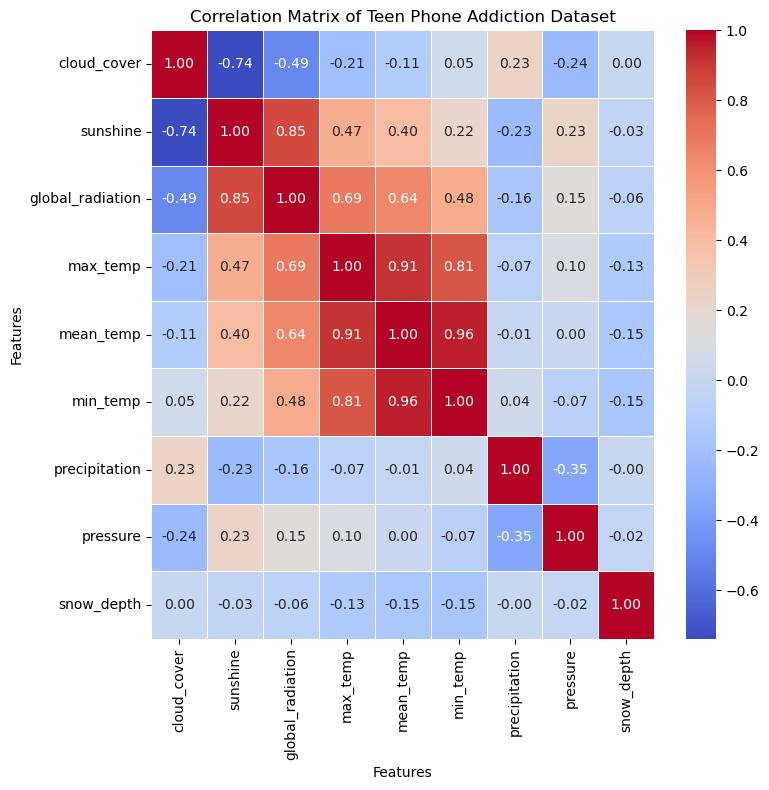

In [11]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

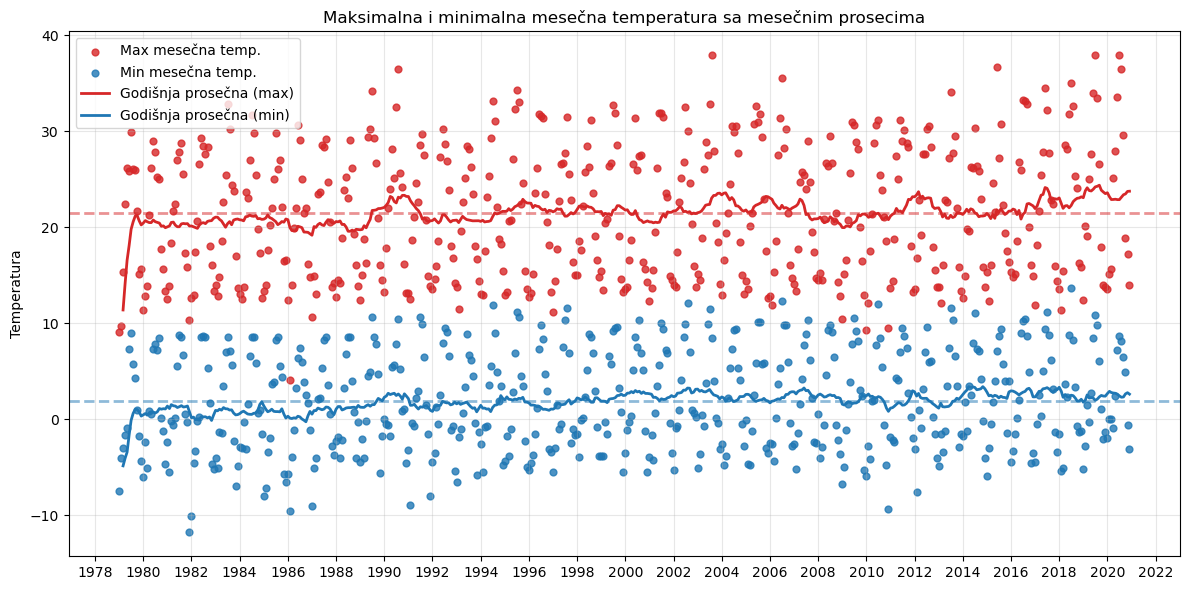

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Mesečni ekstremi temperatura
mx = df['max_temp'].resample('MS').max()
mn = df['min_temp'].resample('MS').min()

# Rolling averages (12 months; tweak window as needed)
window = 12
mx_ma = mx.rolling(window, min_periods=3).mean()
mn_ma = mn.rolling(window, min_periods=3).mean()

fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(mx.index, mx.values, color='tab:red', s=24, alpha=0.8, label='Max mesečna temp.')
ax.scatter(mn.index, mn.values, color='tab:blue', s=24, alpha=0.8, label='Min mesečna temp.')

ax.plot(mx_ma.index, mx_ma.values, color='tab:red', lw=2, label=f'Godišnja prosečna (max)')
ax.plot(mn_ma.index, mn_ma.values, color='tab:blue', lw=2, label=f'Godišnja prosečna (min)')

# Optional overall mean (dashed)
ax.axhline(mx.mean(), color='tab:red', ls='--', lw=2, alpha=0.5)
ax.axhline(mn.mean(), color='tab:blue', ls='--', lw=2, alpha=0.5)

ax.set_title('Maksimalna i minimalna mesečna temperatura sa mesečnim prosecima')
ax.set_xlabel('')
ax.set_ylabel('Temperatura')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()


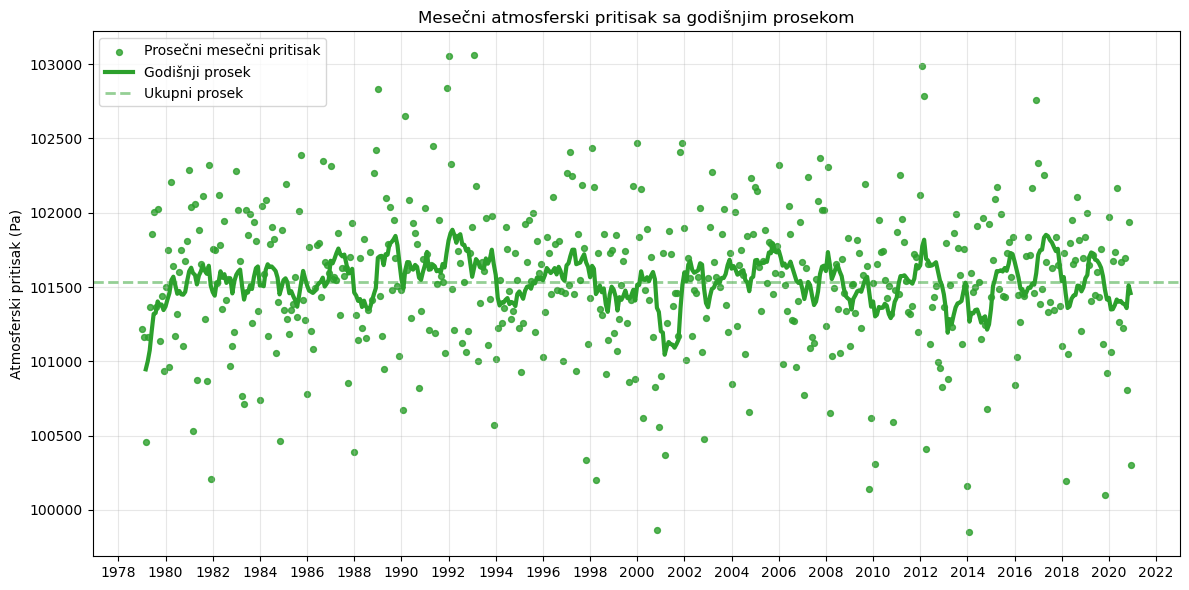

In [13]:
mean_p = df['pressure'].resample('MS').mean()
mean_ma = mean_p.rolling(12, min_periods=3).mean()
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(mean_p.index, mean_p.values, s=18, color='tab:green', alpha=0.8, label='Prosečni mesečni pritisak')
ax.set_ylabel('Atmosferski pritisak (Pa)')
ax.plot(mean_ma.index, mean_ma.values, color='tab:green', lw=3, label='Godišnji prosek')
ax.axhline(mean_p.mean(), color='tab:green', ls='--', lw=2, alpha=0.5, label='Ukupni prosek')
ax.set_title('Mesečni atmosferski pritisak sa godišnjim prosekom')
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()

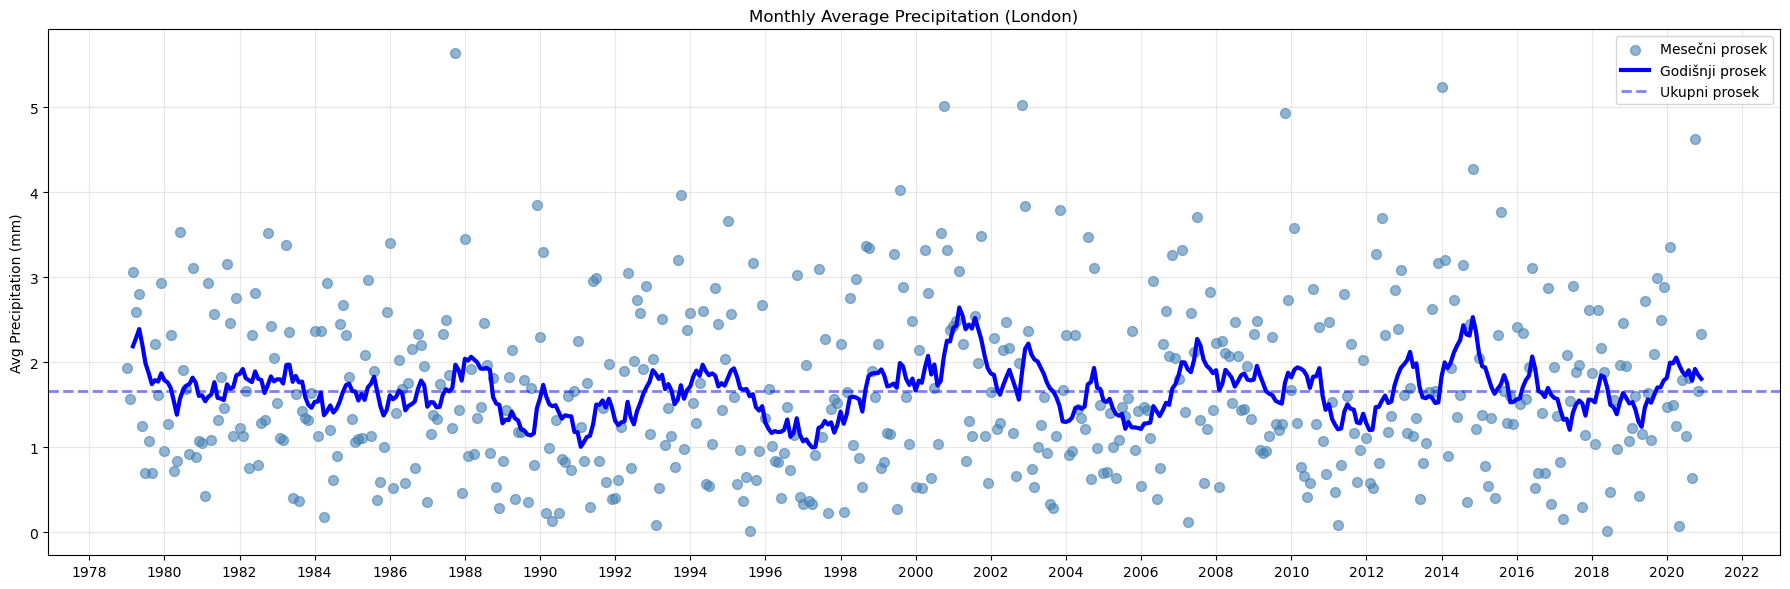

In [14]:
monthly_precip = df["precipitation"].resample("MS").mean()
mean_mp = monthly_precip.rolling(12, min_periods=3).mean()
# Plot monthly averages (with time index)
fig, ax = plt.subplots(figsize=(18,6))
ax.scatter(monthly_precip.index, monthly_precip.values, color="steelblue", s=50, alpha=0.6, label='Mesečni prosek')
ax.plot(mean_mp.index, mean_mp.values, color='blue', lw=3, label='Godišnji prosek')
ax.axhline(monthly_precip.mean(), color='blue', ls='--', lw=2, alpha=0.5, label='Ukupni prosek')
ax.set_title("Monthly Average Precipitation (London)")
ax.set_ylabel("Avg Precipitation (mm)")
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # prikaz svake 2 godine
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.grid(True, alpha=0.3)
ax.legend(loc="best")
plt.tight_layout()
plt.show()

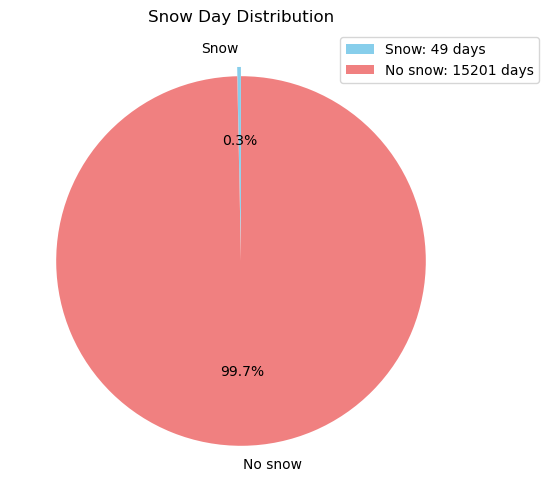

In [15]:
# Create target variable distribution
snow_counts = pd.Series({
    "Snow": df['snow_depth'].where(lambda x: x>0).value_counts().values[0],
    "No snow": df['snow_depth'].where(lambda x: x==0).value_counts().values[0]
})

# Pie chart
plt.figure(figsize=(6, 6))
snow_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Snow Day Distribution")
labels = [f"{cat}: {count} days" for cat, count in snow_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.ylabel("")
plt.show()

In [16]:
df['rain_tomorrow']=df['precipitation'].shift(-1).astype(bool)
df["rain_tomorrow"] = df["rain_tomorrow"].astype(int)
df=df.iloc[:-1]

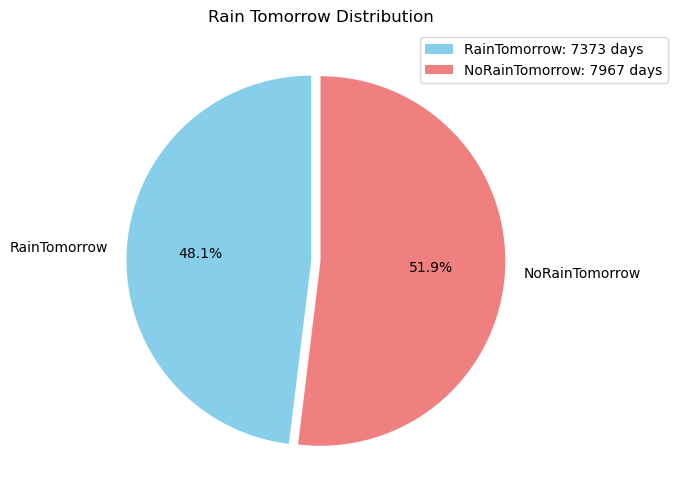

In [17]:
# Create target variable distribution
rain_counts = pd.Series({
    "RainTomorrow": df['rain_tomorrow'].where(lambda x: x==1).value_counts().values[0],
    "NoRainTomorrow": df['rain_tomorrow'].where(lambda x: x==0).value_counts().values[0]
})

# Pie chart
plt.figure(figsize=(6, 6))
rain_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "lightcoral"],
    explode=(0.05, 0)
)
plt.title("Rain Tomorrow Distribution")
plt.ylabel("")
labels = [f"{cat}: {count} days" for cat, count in rain_counts.items()]
plt.legend(labels,bbox_to_anchor=(0.7, 1))
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   precipitation     15340 non-null  float64
 7   pressure          15340 non-null  float64
 8   snow_depth        15340 non-null  float64
 9   rain_tomorrow     15340 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.2 MB


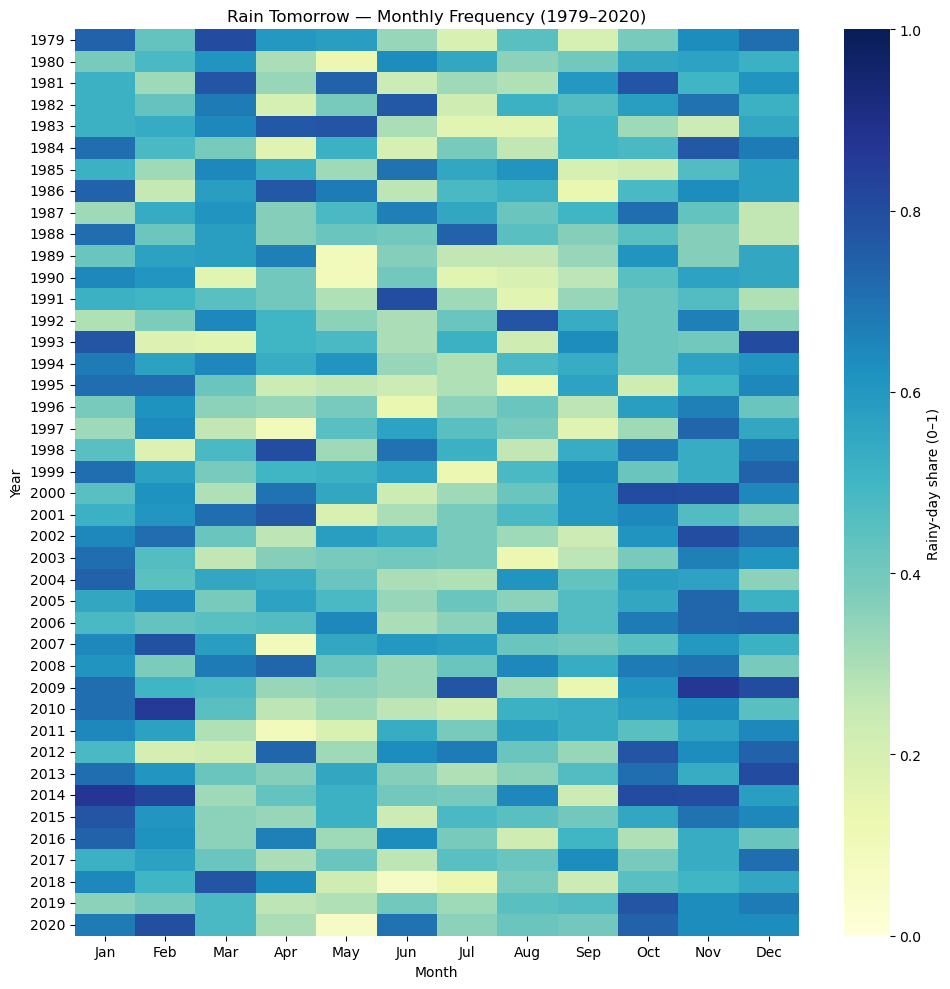

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# monthly rain frequency
monthly = (
    df["rain_tomorrow"]
    .resample("MS").mean()
    .to_frame("rain_freq")
)
monthly["Year"] = monthly.index.year
monthly["Month"] = monthly.index.month

pivot = monthly.pivot(index="Year", columns="Month", values="rain_freq")
pivot = pivot.sort_index()  # years ascending

plt.figure(figsize=(10, 10))
sns.heatmap(
    pivot, 
    annot=False, 
    vmin=0, vmax=1,
    cmap="YlGnBu", 
    cbar_kws={"label": "Rainy-day share (0–1)"}
)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Rain Tomorrow — Monthly Frequency (1979–2020)")
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(np.arange(12)+0.5, months, rotation=0)
plt.tight_layout(); plt.show()


In [20]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 1979-01-01 to 2020-12-01
Freq: MS
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rain_freq  504 non-null    float64
 1   Year       504 non-null    int32  
 2   Month      504 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 11.8 KB


In [22]:
# --- 1. Rainiest & driest MONTHS ---
rainiest_month = monthly.loc[monthly["rain_freq"].idxmax()]
driest_month   = monthly.loc[monthly["rain_freq"].idxmin()]

print("🌧️ Rainiest Month:")
print(f"Year: {rainiest_month['Year']}, Month: {months[int(rainiest_month['Month'])-1]}, "
      f"Rain Frequency: {rainiest_month['rain_freq']:.2f}")

print("\n☀️ Driest Month:")
print(f"Year: {driest_month['Year']}, Month: {months[int(driest_month['Month'])-1]}, "
      f"Rain Frequency: {driest_month['rain_freq']:.2f}")


# --- 2. Rainiest & driest YEARS ---
yearly = monthly.groupby("Year")["rain_freq"].mean()

rainiest_year = yearly.idxmax()
driest_year   = yearly.idxmin()

print("\n📅 Rainiest Year:")
print(f"Year: {rainiest_year}, Avg Rain Frequency: {yearly.max():.2f}")

print("\n📅 Driest Year:")
print(f"Year: {driest_year}, Avg Rain Frequency: {yearly.min():.2f}")


🌧️ Rainiest Month:
Year: 2014.0, Month: Jan, Rain Frequency: 0.87

☀️ Driest Month:
Year: 2020.0, Month: May, Rain Frequency: 0.06

📅 Rainiest Year:
Year: 2014, Avg Rain Frequency: 0.57

📅 Driest Year:
Year: 1990, Avg Rain Frequency: 0.37


In [23]:
monthly['rain_freq'].max()
monthly['rain_freq'].min()

0.06451612903225806

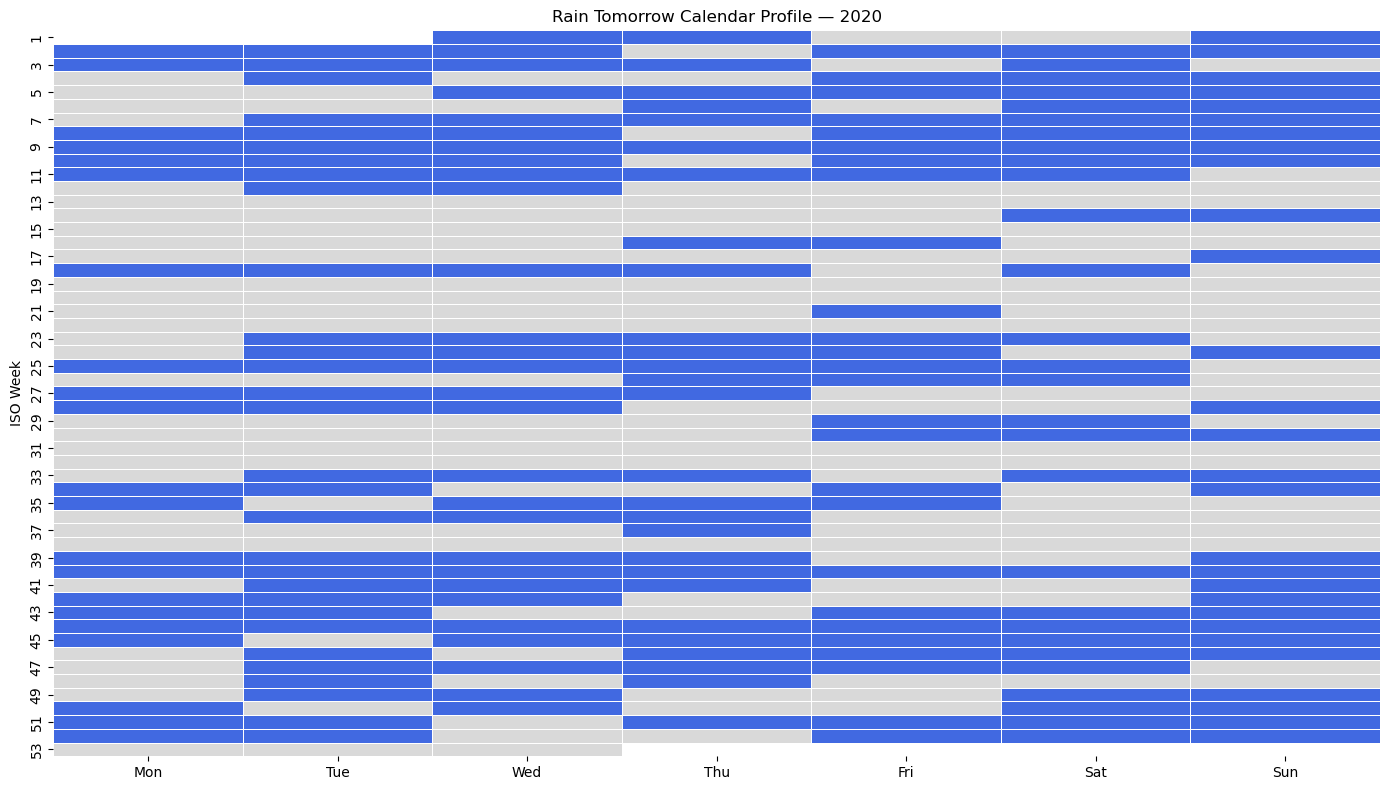

In [24]:
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

def plot_calendar_profile(df, year):
    # Full daily index for that year
    all_days = pd.date_range(f"{year}-01-01", f"{year}-12-31", freq="D")
    tmp = pd.DataFrame(index=all_days)
    tmp["rain_tomorrow"] = df["rain_tomorrow"].reindex(all_days)

    iso = tmp.index.isocalendar()
    tmp["iso_year"] = iso.year
    tmp["iso_week"] = iso.week
    tmp["iso_weekday"] = iso.day  # Mon=1..Sun=7

    cal = tmp[tmp["iso_year"] == year]

    pivot = cal.pivot(index="iso_week", columns="iso_weekday", values="rain_tomorrow")
    weeks = np.arange(1, 54)
    days = np.arange(1, 8)
    pivot = pivot.reindex(index=weeks, columns=days)

    cmap = ListedColormap(["#d9d9d9", "#4169e1"])  # gray=0, blue=1

    plt.figure(figsize=(14,8))
    sns.heatmap(
        pivot, cmap=cmap, vmin=0, vmax=1,
        cbar=False, linewidths=0.5, linecolor="white", mask=pivot.isna()
    )
    plt.xticks([i+0.5 for i in range(7)], ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], rotation=0)
    plt.ylabel("ISO Week")
    plt.xlabel("")
    plt.title(f"Rain Tomorrow Calendar Profile — {year}")
    plt.tight_layout()
    plt.show()

# Example: profile for 2019
plot_calendar_profile(df, 2020)


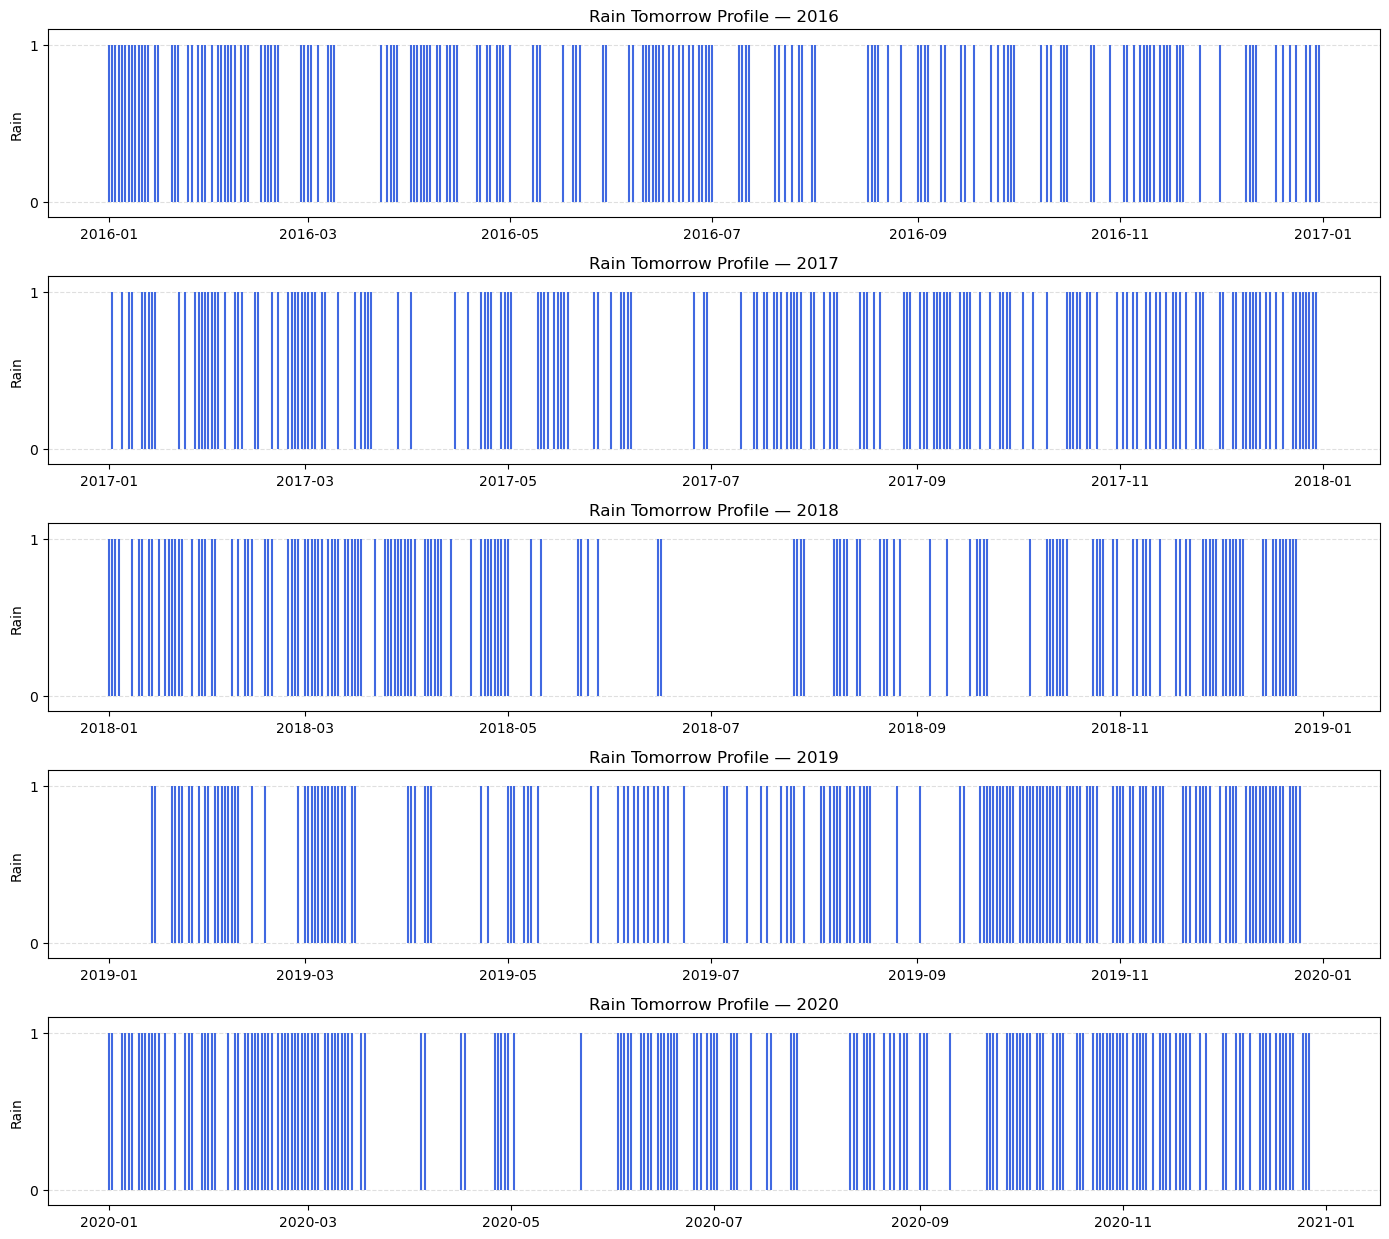

In [25]:
years = [2016, 2017, 2018, 2019, 2020]  # pick any 5 years

fig, axes = plt.subplots(len(years), 1, figsize=(14, 2.5*len(years)), sharey=True)

for ax, y in zip(axes, years):
    df_year = df[df.index.year == y]
    ax.stem(df_year.index, df_year['rain_tomorrow'], 
            linefmt="royalblue", markerfmt=" ", basefmt=" ")
    ax.set_title(f"Rain Tomorrow Profile — {y}")
    ax.set_ylim(-0.1, 1.1)
    ax.grid(axis="y", linestyle="--", alpha=0.4)
    ax.set_yticks([0,1])
    ax.set_ylabel("Rain")

plt.tight_layout()
plt.show()


## Logistic regression

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   pressure          15340 non-null  float64
 7   snow_depth        15340 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB
<class 'pandas.core.series.Series'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Series name: rain_tomorrow
Non-Null Count  Dtype
--------------  -----
15340 non-null  int32
dtypes: int32(1)
memory usage: 695.8 KB


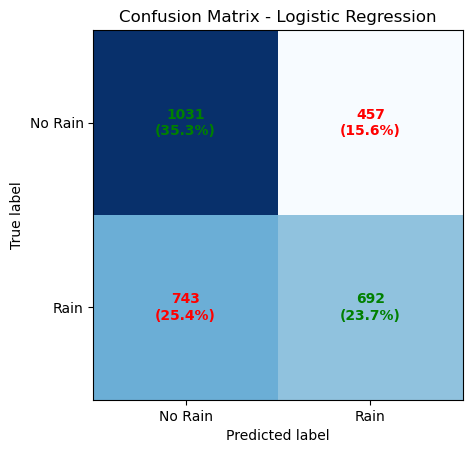

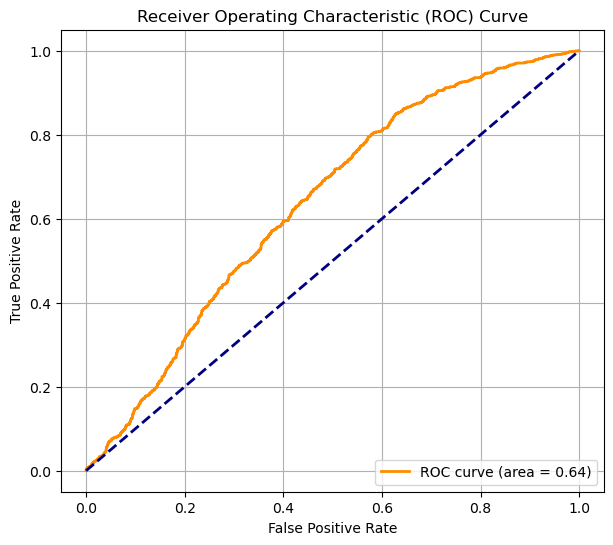

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

train_date = df.index.max() - pd.DateOffset(years=8)

X = df.drop(columns=["precipitation", "rain_tomorrow"])
y = df["rain_tomorrow"]

X_train = X.loc[:train_date]
y_train = y[:train_date]
X_test = X.loc[train_date:]
y_test = y[train_date:]
'''X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)'''

# Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)

cm = confusion_matrix(y_test, y_pred)
cm_sum = cm.sum()

labels = ["No Rain", "Rain"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots()
# Disable sklearn's default numbers with values_format=None
disp.plot(cmap="Blues", ax=ax, colorbar=False, include_values=False)

# Add custom annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = (count / cm_sum) * 100
        color = "green" if i == j else "red"
        ax.text(
            j, i, f"{count}\n({percent:.1f}%)",
            ha="center", va="center", color=color, fontsize=10, weight="bold"
        )

plt.title("Confusion Matrix - Logistic Regression")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_val:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [39]:
X_test.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2923 entries, 2012-12-30 to 2020-12-30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       2923 non-null   float64
 1   sunshine          2923 non-null   float64
 2   global_radiation  2923 non-null   float64
 3   max_temp          2923 non-null   float64
 4   mean_temp         2923 non-null   float64
 5   min_temp          2923 non-null   float64
 6   pressure          2923 non-null   float64
 7   snow_depth        2923 non-null   float64
dtypes: float64(8)
memory usage: 205.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12418 entries, 1979-01-01 to 2012-12-30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       12418 non-null  float64
 1   sunshine          12418 non-null  float64
 2   global_radiation  12418 non-null  float64
 3  

In [18]:
# Simplified table: just accuracy, precision, recall, f1 for each class + ROC-AUC
metrics_simple = {
    "Accuracy": report["accuracy"],
    "Precision (No Rain)": report['False']["precision"],
    "Precision (Rain)": report['True']["precision"],
    "Recall (No Rain)": report["False"]["recall"],
    "Recall (Rain)": report['True']["recall"],
    "F1-score (No Rain)": report["False"]["f1-score"],
    "F1-score (Rain)": report['True']["f1-score"],
    "ROC-AUC": roc_auc
}
metrics_simple = {k: round(v, 2) for k, v in metrics_simple.items()}
metrics_simple_df = pd.DataFrame(metrics_simple, index=["Logistic Regression"]).T
display(metrics_simple_df)


,Logistic Regression
Accuracy,0.66
Precision (No Rain),0.66
Precision (Rain),0.66
Recall (No Rain),0.72
Recall (Rain),0.60
F1-score (No Rain),0.69
F1-score (Rain),0.63
ROC-AUC,0.71


## LSTM

In [52]:
df.drop(columns=['rain_tomorrow']).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   precipitation     15340 non-null  float64
 7   pressure          15340 non-null  float64
 8   snow_depth        15340 non-null  float64
dtypes: float64(9)
memory usage: 1.7 MB


X shape: (15310, 30, 9)
y shape: (15310,)
Epoch 1/20
192/192 [==============================] - 6s 17ms/step - loss: 0.6708 - accuracy: 0.5855 - auc: 0.6181 - val_loss: 0.6583 - val_accuracy: 0.6074 - val_auc: 0.6585
Epoch 2/20
192/192 [==============================] - 2s 13ms/step - loss: 0.6566 - accuracy: 0.6151 - auc: 0.6530 - val_loss: 0.6440 - val_accuracy: 0.6267 - val_auc: 0.6792
Epoch 3/20
192/192 [==============================] - 2s 13ms/step - loss: 0.6494 - accuracy: 0.6278 - auc: 0.6678 - val_loss: 0.6361 - val_accuracy: 0.6359 - val_auc: 0.6919
Epoch 4/20
192/192 [==============================] - 2s 13ms/step - loss: 0.6447 - accuracy: 0.6341 - auc: 0.6751 - val_loss: 0.6331 - val_accuracy: 0.6434 - val_auc: 0.6958
Epoch 5/20
192/192 [==============================] - 2s 13ms/step - loss: 0.6435 - accuracy: 0.6395 - auc: 0.6782 - val_loss: 0.6311 - val_accuracy: 0.6476 - val_auc: 0.7004
Epoch 6/20
192/192 [==============================] - 2s 13ms/step - loss: 0.6397 -

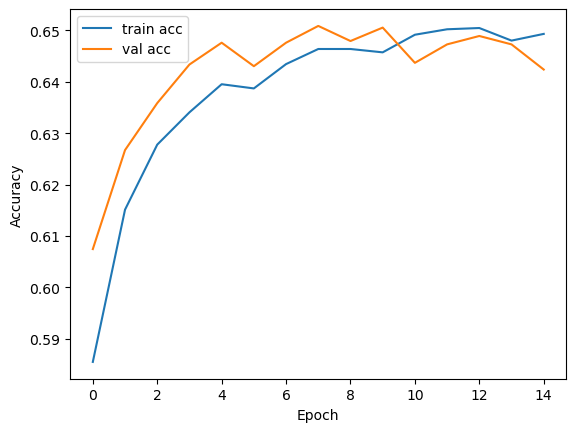

96/96 [==============================] - 1s 4ms/step


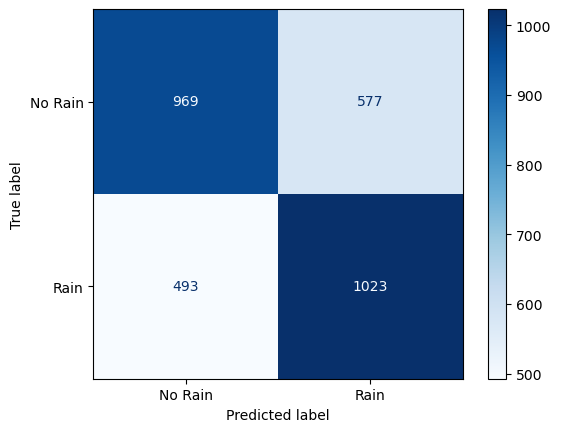

In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


# --- Load your dataset (already DataFrame 'df' as you showed) ---
# Index: DatetimeIndex, Features: 9 columns, Target: 'rain_tomorrow'

std_scaller = StandardScaler()

# Normalize features
#features = std_scaller.fit_transform(df.drop(columns=['rain_tomorrow']))
features= std_scaller.fit_transform(df.drop(columns=['rain_tomorrow']))
features = pd.DataFrame(features, columns=df.drop(columns=['rain_tomorrow']).columns)
#features = df.drop(columns=['rain_tomorrow'])
#print(type(features))
target = df['rain_tomorrow']

#mu = features.mean()
#sigma = features.std().replace(0, 1)
#features_norm = (features - mu) / sigma
#print(type(features_norm))
# --- Windowing function ---
LOOKBACK = 30  # past 30 days
def make_windows(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback].values)
        ys.append(y.iloc[i+lookback])
    return np.array(Xs), np.array(ys)

X, y = make_windows(features, target, LOOKBACK)
print("X shape:", X.shape)  # (num_samples, lookback, num_features)
print("y shape:", y.shape)  # (num_samples,)

# --- Train/test split (80/20) ---
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

# --- Dataset pipeline ---
BATCH = 64
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2048).batch(BATCH).prefetch(2)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

# --- Build LSTM classifier ---
F = X.shape[-1]  # number of features
model = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(32),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

# --- Train ---
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

# --- Evaluate ---
test_loss, test_acc, test_auc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.3f}, AUC: {test_auc:.3f}")

# --- Plot learning curves ---
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Predict probabilities for test set ---
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# --- Confusion matrix ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap="Blues")
plt.show()


X shape: (15310, 30, 9)
y shape: (15310,)
Epoch 1/20
192/192 [==============================] - 5s 17ms/step - loss: 0.6715 - accuracy: 0.5874 - auc: 0.6168 - val_loss: 0.6505 - val_accuracy: 0.6300 - val_auc: 0.6717
Epoch 2/20
192/192 [==============================] - 3s 13ms/step - loss: 0.6571 - accuracy: 0.6179 - auc: 0.6534 - val_loss: 0.6460 - val_accuracy: 0.6234 - val_auc: 0.6758
Epoch 3/20
192/192 [==============================] - 3s 13ms/step - loss: 0.6495 - accuracy: 0.6291 - auc: 0.6670 - val_loss: 0.6360 - val_accuracy: 0.6326 - val_auc: 0.6922
Epoch 4/20
192/192 [==============================] - 3s 13ms/step - loss: 0.6468 - accuracy: 0.6315 - auc: 0.6713 - val_loss: 0.6351 - val_accuracy: 0.6404 - val_auc: 0.6942
Epoch 5/20
192/192 [==============================] - 3s 13ms/step - loss: 0.6417 - accuracy: 0.6381 - auc: 0.6796 - val_loss: 0.6350 - val_accuracy: 0.6430 - val_auc: 0.6976
Epoch 6/20
192/192 [==============================] - 3s 13ms/step - loss: 0.6400 -

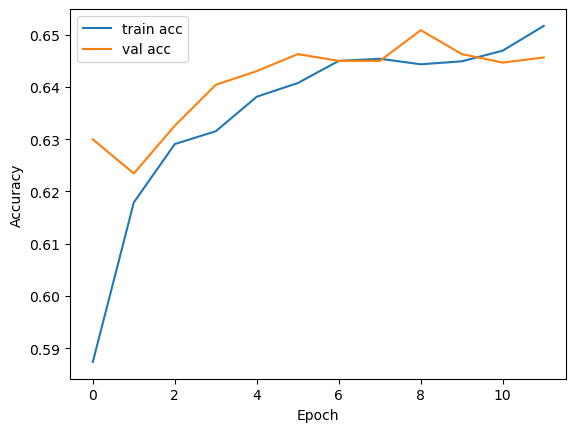

96/96 [==============================] - 1s 4ms/step


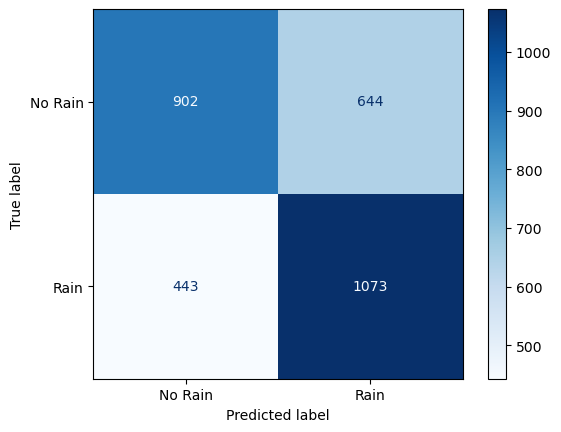

In [59]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


# --- Load your dataset (already DataFrame 'df' as you showed) ---
# Index: DatetimeIndex, Features: 9 columns, Target: 'rain_tomorrow'

#std_scaller = StandardScaler()

# Normalize features
#features = std_scaller.fit_transform(df.drop(columns=['rain_tomorrow']))
#features= std_scaller.fit_transform(df.drop(columns=['rain_tomorrow']))
#features = pd.DataFrame(features, columns=df.drop(columns=['rain_tomorrow']).columns)
features = df.drop(columns=['rain_tomorrow'])
#print(type(features))
target = df['rain_tomorrow']

mu = features.mean()
sigma = features.std().replace(0, 1)
features_norm = (features - mu) / sigma
#print(type(features_norm))
# --- Windowing function ---
LOOKBACK = 30  # past 30 days
def make_windows(X, y, lookback):
    Xs, ys = [], []
    for i in range(len(X) - lookback):
        Xs.append(X[i:i+lookback].values)
        ys.append(y.iloc[i+lookback])
    return np.array(Xs), np.array(ys)

X, y = make_windows(features_norm, target, LOOKBACK)
print("X shape:", X.shape)  # (num_samples, lookback, num_features)
print("y shape:", y.shape)  # (num_samples,)

# --- Train/test split (80/20) ---
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

# --- Dataset pipeline ---
BATCH = 64
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(2048).batch(BATCH).prefetch(2)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(BATCH).prefetch(2)

# --- Build LSTM classifier ---
F = X.shape[-1]  # number of features
model = keras.Sequential([
    keras.layers.Input(shape=(LOOKBACK, F)),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.Dropout(0.3),
    keras.layers.LSTM(32),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")  # binary classification
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

# --- Train ---
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    ]
)

# --- Evaluate ---
test_loss, test_acc, test_auc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.3f}, AUC: {test_auc:.3f}")

# --- Plot learning curves ---
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Predict probabilities for test set ---
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# --- Confusion matrix ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["No Rain", "Rain"])
disp.plot(cmap="Blues")
plt.show()


## Neural Network

In [19]:
x = df.copy()
x.drop(columns=['rain_tommorrow','precipitation'], inplace=True)
y = df['rain_tommorrow']
x.info()
y.info()
x.shape, y.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15340 non-null  float64
 1   sunshine          15340 non-null  float64
 2   global_radiation  15340 non-null  float64
 3   max_temp          15340 non-null  float64
 4   mean_temp         15340 non-null  float64
 5   min_temp          15340 non-null  float64
 6   pressure          15340 non-null  float64
 7   snow_depth        15340 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB
<class 'pandas.core.series.Series'>
DatetimeIndex: 15340 entries, 1979-01-01 to 2020-12-30
Series name: rain_tommorrow
Non-Null Count  Dtype
--------------  -----
15340 non-null  bool 
dtypes: bool(1)
memory usage: 134.8 KB


((15340, 8), (15340,))

In [20]:
from sklearn.preprocessing import StandardScaler
n = len(x)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

x_train, y_train = x.iloc[:train_end], y.iloc[:train_end]
x_val, y_val = x.iloc[train_end:val_end], y.iloc[train_end:val_end]
x_test, y_test = x.iloc[val_end:], y.iloc[val_end:]

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

(len(x_train_s), len(x_val), len(x_test))

(10738, 2301, 2301)

In [21]:
import tensorflow as tf
def build_model(input_dim, seed=42):
    tf.keras.utils.set_random_seed(seed)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_model(x_train_s.shape[1])
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history = model.fit(
    x_train_s, y_train,
    validation_data=(x_val_s, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)


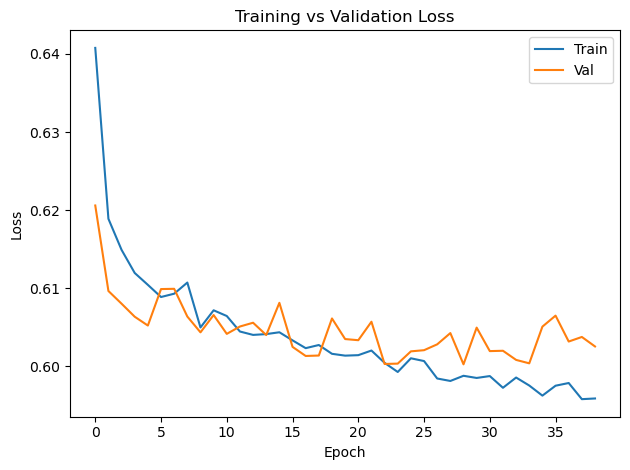

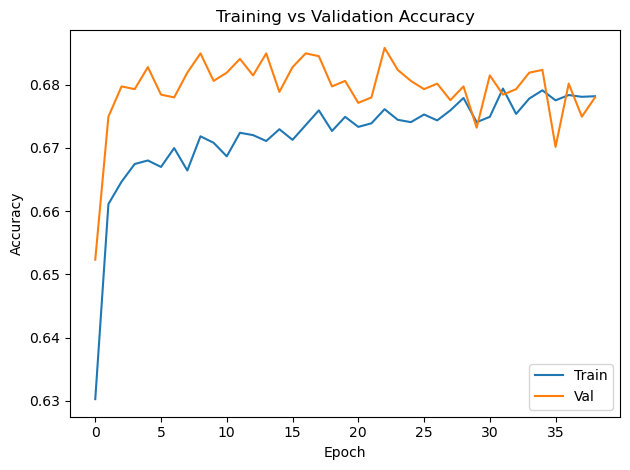

In [22]:

# Loss
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Val"])
plt.tight_layout()
plt.show()

# Accuracy (if available)
if "accuracy" in history.history and "val_accuracy" in history.history:
    plt.figure()
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Val"])
    plt.tight_layout()
    plt.show()


72/72 [==============================] - 0s 1ms/step
Test Accuracy: 0.6832
Test ROC-AUC: 0.7424197046838557
Confusion Matrix:
 [[768 420]
 [309 804]]


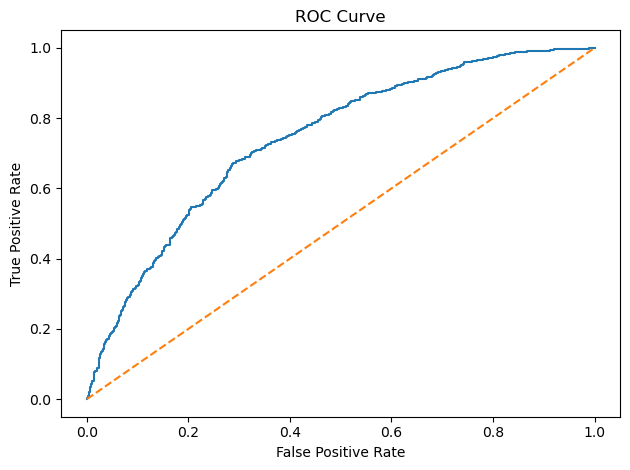

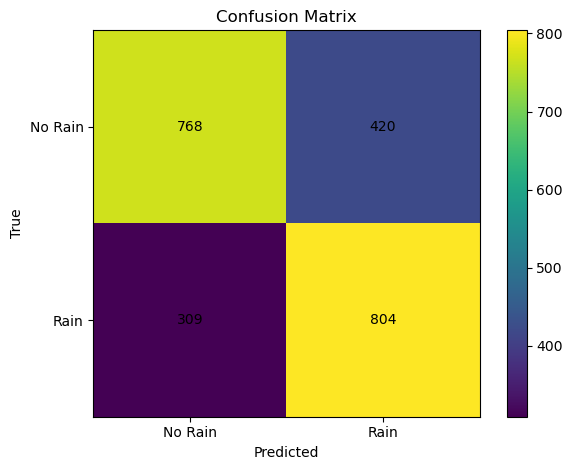

In [23]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

proba_test = model.predict(x_test_s).ravel()
pred_test = (proba_test >= 0.5).astype(int)

acc = accuracy_score(y_test, pred_test)
try:
    auc = roc_auc_score(y_test, proba_test)
except ValueError:
    auc = float("nan")

cm = confusion_matrix(y_test, pred_test)
print(f"Test Accuracy: {acc:.4f}")
print("Test ROC-AUC:", auc if (isinstance(auc, float) and not np.isnan(auc)) else "N/A")
print("Confusion Matrix:\n", cm)

# ROC curve
if len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, proba_test)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.tight_layout()
    plt.show()

# Confusion matrix heatmap
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["No Rain", "Rain"])
plt.yticks([0,1], ["No Rain", "Rain"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()
